In [35]:
import logging, json
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from apsopt.core.optimizer import Optimizer, try_parse_dict

logger = logging.getLogger(__name__)

In [53]:
FPATH1 = '20231126T213817_exp_mobo_6and3_v1_dump.json' # run 1 26
FPATH2 = '20231126T215647_exp_mobo_6and3_v1_dump.json' # run 2 23
FPATH3 = '20231126T221803_exp_mobo_6and3_v1_dump.json' # run 3?
FPATH4 = '20231126T225732_exp_mobo_6and3_v1_dump.json' # run 4, partial save
FPATH5 = '20231126T230627_exp_mobo_6and3_v1_dump.json' # run 4,
FPATH6 = '20231126T230759_exp_mobo_6and3_v1_dump.json' # run 4, all zeros at end

GAPATH1 = '20231126T234452_exp_moga_dump.json' # run 1 partial
GAPATH2 = '20231126T235426_exp_moga_dump.json' # run 2 partial

DATA_FILES = [FPATH1, FPATH2, FPATH3, FPATH5]
opts = []
for FPATH in DATA_FILES:
    with open(FPATH,'r') as f:
        data = json.load(f)
    kwargs = try_parse_dict(data, skip_evaluator=True)
    opt = Optimizer(**kwargs)
    opts.append(opt)
    print(opt.data.shape)

gopts = []
for FPATH in [GAPATH2]:
    with open(FPATH,'r') as f:
        data = json.load(f)
    data['generator']['population'] = pd.DataFrame(data['generator']['population'])
    kwargs = try_parse_dict(data, skip_evaluator=True)
    opt = Optimizer(**kwargs)
    gopts.append(opt)
    print(opt.data.shape)

(26, 22)
(23, 22)
(23, 22)
(33, 22)
New offspring in update_data: 42
Next generation in update_data
(42, 22)


In [54]:
# remove bad points
for opt in opts:
    bads = []
    for k,v in opt.data_obj.model.output_data.items():
        if v['LT'] > 7:
            bads.append(k)
    opt.remove_steps(bads)
    print('removed', bads)

removed []
removed []
removed [3]
removed []


In [55]:
opts[2].data 

,SVD0,SH1,SH3,SH4,SL1,SL2,SL3,result,exception,traceback,...,valid,_nux,_nuy,_eps_x_bxbOn,_eps_y_bxbOn,_eps_x_bxbOff,_eps_y_bxbOff,LT,_raw_LT,EFF
1,0.000000,-0.200000,-0.080000,0.000000,0.000000,-0.500000,-0.500000,"{'_nux': 0.20570257065981729, '_nuy': 0.268003...",None,,...,True,0.205703,0.268004,2.185568e-09,1.653258e-11,2.209514e-09,1.637865e-11,3.845968,4.818205,4.187326
2,0.010133,-0.186588,-0.080199,0.005180,-0.005754,-0.482048,-0.508045,"{'_nux': 0.2062773166563648, '_nuy': 0.2672714...",None,,...,True,0.206277,0.267271,2.219417e-09,1.645138e-11,2.206530e-09,1.634399e-11,3.894681,4.871128,2.985835
4,-0.493927,0.266377,0.104464,0.241857,-0.264987,0.626695,0.384264,"{'_nux': 0.22259395855770828, '_nuy': 0.244169...",None,,...,True,0.222594,0.244170,1.827058e-09,6.785483e-11,2.028564e-09,3.257560e-11,NaN,20.148146,2.316626
5,-0.479937,-0.214487,0.100901,0.235901,-0.256262,0.576285,0.362777,"{'_nux': 0.2201932486651376, '_nuy': 0.2456345...",None,,...,True,0.220193,0.245635,2.065692e-09,3.136374e-11,2.053249e-09,3.120938e-11,NaN,12.160018,13.713177
6,-0.476143,-0.373280,0.100258,0.234075,-0.253183,0.557082,0.357465,"{'_nux': 0.21925738644994497, '_nuy': 0.267657...",None,,...,True,0.219257,0.267658,2.103382e-09,2.703305e-11,2.073697e-09,3.096569e-11,NaN,10.381920,17.890006
7,-0.423861,-0.396658,0.088972,0.207552,-0.213430,0.316267,0.276909,"{'_nux': 0.21714151178249153, '_nuy': 0.248940...",None,,...,True,0.217142,0.248941,2.154456e-09,2.263963e-11,2.088612e-09,2.761238e-11,5.603375,9.134843,49.471291
8,-0.429505,-0.057436,0.090175,0.210401,-0.216799,0.259041,0.284029,"{'_nux': 0.2185249626112559, '_nuy': 0.2484727...",None,,...,True,0.218525,0.248473,2.111479e-09,2.219886e-11,2.102243e-09,2.703277e-11,5.824107,9.399837,59.312365
9,-0.456929,0.223517,0.096017,0.224270,-0.239056,0.289082,0.327827,"{'_nux': 0.21990842687627796, '_nuy': 0.258711...",None,,...,True,0.219908,0.258711,2.190078e-09,2.732973e-11,2.095139e-09,2.603872e-11,6.900522,10.937099,12.332293
10,-0.421814,-0.102475,0.088434,0.206380,-0.202371,0.452954,0.259185,"{'_nux': 0.21897255122482764, '_nuy': 0.248106...",None,,...,True,0.218973,0.248107,2.122848e-09,2.334906e-11,2.105601e-09,2.502721e-11,6.085743,9.463305,22.755922
11,-0.485338,-0.161193,0.102944,0.238375,-0.265432,0.251778,0.425520,"{'_nux': 0.21860634602361195, '_nuy': 0.246580...",None,,...,True,0.218606,0.246581,2.118431e-09,2.481915e-11,2.114350e-09,2.480734e-11,6.316929,9.784075,48.250894


In [56]:
hvsl = []
rp = opts[1].generator.reference_point
for opt in opts:
    hvs = []
    for i in range(1,len(opt.data)):
        hv = opt.generator.calculate_hypervolume_at(rp, i)
        hvs.append(hv)
    hvsl.append(hvs)

ghvsl = []
for opt in gopts:
    hvs = []
    for i in range(1,len(opt.data)):
        hv = opt.generator.calculate_hypervolume_at(opt.data, i)
        hvs.append(hv)
    ghvsl.append(hvs)

In [57]:
raise

RuntimeError: No active exception to reraise

Text(0, 0.5, 'Hypervolume')

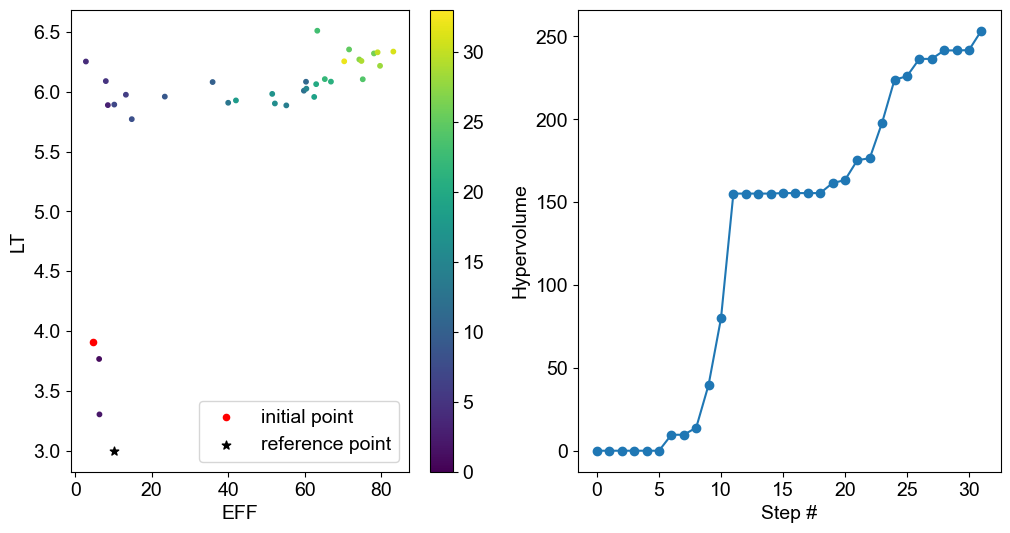

In [ ]:
i = 3
opt = opts[i]

fig,ax = plt.subplots(1,2,squeeze=False,figsize=(12,6))
df = opt.data
ol = ['EFF', 'LT']
l = ax[0,0].scatter(df.loc[:,ol[0]], df.loc[:,ol[1]],10,marker='o',c=range(len(df)),vmax=len(df))
ax[0,0].scatter(df.loc[:1,ol[0]], df.loc[:1,ol[1]], 20,marker='o',c='red',label='initial point')
ax[0,0].scatter(rp[ol[0]], rp[ol[1]],40,marker='*',c='black',label='reference point')
ax[0,0].set_xlabel(ol[0])
ax[0,0].set_ylabel(ol[1])
fig.colorbar(l)
ax[0,0].legend()

ax[0,1].plot(hvsl[i],marker='o')
ax[0,1].set_xlabel('Step #')
ax[0,1].set_ylabel('Hypervolume')

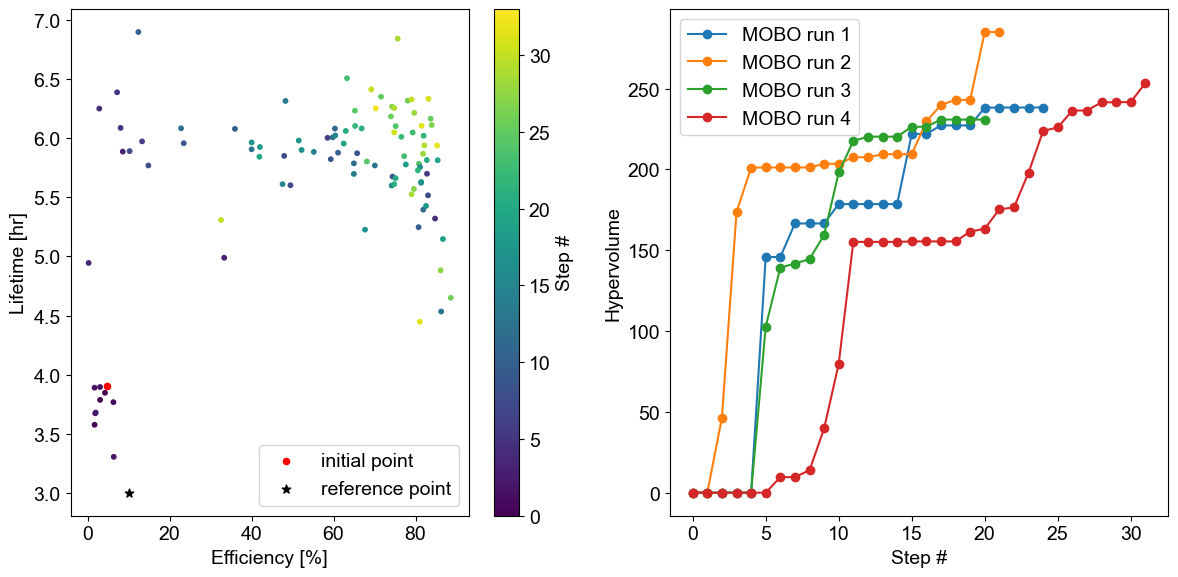

In [61]:
fig,ax = plt.subplots(1,2,squeeze=False,figsize=(12,6))
ol = ['EFF', 'LT']
namemap = {'EFF':'Efficiency [%]', 'LT':'Lifetime [hr]'}
for opt in opts:
    df = opt.data
    l = ax[0,0].scatter(df.loc[:,ol[0]], df.loc[:,ol[1]],10,marker='o',c=range(len(df)),vmax=len(df))
# for opt in gopts:
#     df = opt.data
#     l = ax[0,0].scatter(df.loc[:,ol[0]], df.loc[:,ol[1]],10,marker='o',c='red',vmax=len(df))
#change matplotlib font
import matplotlib
matplotlib.rcParams['font.family'] = 'sans-serif'
matplotlib.rcParams['font.sans-serif'] = 'Arial'
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['axes.labelsize'] = 14

ax[0,0].scatter(df.loc[:1,ol[0]], df.loc[:1,ol[1]], 20,marker='o',c='red',label='initial point')
ax[0,0].scatter(rp[ol[0]], rp[ol[1]],40,marker='*',c='black',label='reference point')
ax[0,0].set_xlabel(namemap[ol[0]])
ax[0,0].set_ylabel(namemap[ol[1]])
cb = fig.colorbar(l)
cb.set_label('Step #')
ax[0,0].legend()

for i, hvs in enumerate(hvsl):
    ax[0,1].plot(hvs,marker='o',label=f'MOBO run {i+1}')
# for i, hvs in enumerate(ghvsl):
#     ax[0,1].plot(hvs,marker='o',label=f'MOGA run {i}')
ax[0,1].set_xlabel('Step #')
ax[0,1].set_ylabel('Hypervolume')
ax[0,1].legend()
fig.tight_layout()

In [ ]:
fig,ax = plt.subplots(1,2,squeeze=False,figsize=(12,6))
df = opt.data
ol = ['EFF', 'LT']
l = ax[0,0].scatter(df.loc[:,ol[0]], df.loc[:,ol[1]],10,marker='o',c=range(len(df)),vmax=len(df))
ax[0,0].scatter(df.loc[:1,ol[0]], df.loc[:1,ol[1]], 20,marker='o',c='red',label='initial point')
ax[0,0].scatter(rp[ol[0]], rp[ol[1]],40,marker='*',c='black',label='reference point')
ax[0,0].set_xlabel(ol[0])
ax[0,0].set_ylabel(ol[1])
fig.colorbar(l)
ax[0,0].legend()
ax[0,0].set_xlim(70,100)
ax[0,0].set_ylim(9,None)

ax[0,1].plot(hvs,marker='o')
ax[0,1].set_xlabel('Step #')
ax[0,1].set_ylabel('Hypervolume')

In [ ]:
fig,ax = plt.subplots(1,2,squeeze=False,figsize=(8,6))
df = opt.data

ax[0,0].plot(df.loc[:,'_nux'], marker='o', label='nux')
ax[0,0].plot(df.loc[:,'_nuy'], marker='o', label='nuy')
ax[0,1].plot(df.loc[:,'_eps_x_bxbOn'], marker='o', label='eps_x_bxbOn', color='red')
ax[0,1].plot(df.loc[:,'_eps_y_bxbOn']*1e2, marker='o', label='eps_y_bxbOn', color='green')
ax[0,0].set_xlabel('Step #')
ax[0,0].set_ylabel('Tune')
ax[0,0].legend()
ax[0,1].legend()

In [ ]:
fig,ax = plt.subplots(1,1,squeeze=False,figsize=(8,6))
df = opt.data

ax[0,0].plot(df.loc[:,'_eps_x_bxbOn'],marker='o', label='eps_x_bxbOn', color='green')
ax[0,0].plot(df.loc[:,'_eps_y_bxbOn']*1e2,marker='o', label='eps_y_bxbOn', color='red')
ax2 = ax[0,0].twinx()
ax2.plot(df.loc[:,'LT'],marker='o', label='LT')
ax[0,0].set_xlabel('Step #')
ax[0,0].set_ylabel('Emittance')
ax[0,0].legend()
ax2.legend()

In [ ]:
fig,ax = plt.subplots(1,1,squeeze=False,figsize=(8,6))
df = opt.data

ax[0,0].plot(df.loc[:,'_eps_x_bxbOn']*df.loc[:,'_eps_y_bxbOn'],marker='o', label='eps_xy', color='green')
ax2 = ax[0,0].twinx()
ax2.plot(df.loc[:,'LT'],marker='o', label='LT')
ax[0,0].set_xlabel('Step #')
ax[0,0].set_ylabel('Emittance')
ax[0,0].legend()
ax2.legend()